In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Data Preprocessing

In [6]:
data = pd.read_csv('pd_speech_features.csv', skiprows=1)
data = data.iloc[:,1:]
data

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,0.000005,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 754 entries, gender to class
dtypes: float64(749), int64(5)
memory usage: 4.3 MB


In [8]:
# Check missing value
data.isnull().sum().sum()

0

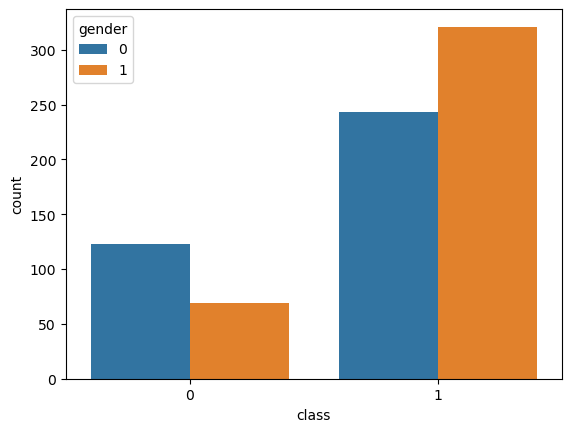

In [21]:
sns.countplot(x='class', hue='gender', data=data)
plt.show()

In [12]:
# Split dataset
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state = 42)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 529 observation with 753 features
test data has 227 observation with 753 features


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train, X_test = X_train_scaled, X_test_scaled

# Model

In [68]:
def print_grid_search(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

def get_metrics(model, mode = 'test'):
    if mode == 'train':
        X, y = X_train, y_train
    elif mode == 'test':
        X, y = X_test, y_test
    results = {}
    y_pred = model.predict(X)
    y_pred_prob = model.predict_proba(X)[:, 1]
    results['accuracy'] = accuracy_score(y, y_pred)
    results['precision'] = precision_score(y, y_pred)
    results['recall'] = recall_score(y, y_pred)
    results['f1'] = f1_score(y, y_pred)
    results['auc'] = roc_auc_score(y, y_pred_prob)
    return results
def get_results(model):
    res1, res2 = get_metrics(model, mode='train'), get_metrics(model, mode='test')
    print(f'Train:\n{res1}')
    print(f'Test:\n{res2}')
    return res1, res2

## Logistic Regression

In [40]:
params = {
    'C': [0.01, 0.1, 1.0],
    'penalty': ['l1', 'l2']
}
grid_lr = GridSearchCV(LogisticRegression(solver='liblinear',random_state=42),params, cv = 5)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1.0], 'penalty': ['l1', 'l2']})

In [41]:
print_grid_search(grid_lr)

Best score: 0.8430368373764601
Best parameters set:
C:0.1
penalty:l1


In [69]:
best_lr = grid_lr.best_estimator_
res_lr_train, res_lr_test = get_results(best_lr)

Train:
{'accuracy': 0.9073724007561437, 'precision': 0.9011494252873563, 'recall': 0.9849246231155779, 'f1': 0.9411764705882353, 'auc': 0.9621389389696575}
Test:
{'accuracy': 0.8502202643171806, 'precision': 0.8473684210526315, 'recall': 0.9698795180722891, 'f1': 0.9044943820224719, 'auc': 0.8773454473632234}


In [70]:
df_train_result = pd.DataFrame(res_lr_train, index=['lr'])
df_test_result = pd.DataFrame(res_lr_test, index=['lr'])

## Decision Tree